In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! pip install scikit-learn

In [19]:
# Load the dataset
data = pd.read_csv("obesity_data.csv")

data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,1,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,1,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,1,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,0,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,0,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Handle missing values (if any)
data = data.fillna(method='ffill') # Example: Forward fill missing values


C:\Users\girip\AppData\Local\Temp\ipykernel_1236\218389512.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill') # Example: Forward fill missing values


In [17]:
from sklearn.preprocessing import LabelEncoder

# Example data
data = ['Gender', 'FAVC', 'SMOKE', 'CH20', 'SCC', 'MTRANS', 'NObeyesdad']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
encoded_data = label_encoder.fit_transform(data)

print("Encoded data:", encoded_data)
print("Inverse transform:", label_encoder.inverse_transform(encoded_data))


Encoded data: [2 1 6 0 5 3 4]
Inverse transform: ['Gender' 'FAVC' 'SMOKE' 'CH20' 'SCC' 'MTRANS' 'NObeyesdad']


In [20]:
print(type(data))  

<class 'pandas.core.frame.DataFrame'>


In [21]:
# Feature Engineering
# Calculate BMI
data['BMI'] = data['Weight'] / (data['Height'] ** 2)


In [22]:
data['BMI']


0       24.386526
1       24.238227
2       23.765432
3       26.851852
4       28.342381
          ...    
2106    44.901475
2107    43.741923
2108    43.543817
2109    44.071535
2110    44.144338
Name: BMI, Length: 2111, dtype: float64

In [23]:
# Feature Selection
X = data[['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP', 'CAEC', 'FAVC', 'SMOKE', 'CH2O', 'SCC', 'MTRANS']]
y = data['NObeyesdad']


In [24]:
X = pd.get_dummies(X, drop_first=True)

In [25]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Neural Network': MLPClassifier()
}




In [28]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy


C:\Users\girip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
# Print results
for name, accuracy in results.items():
    print(f"{name} Accuracy: {accuracy:.2f}")



Logistic Regression Accuracy: 0.92
Decision Tree Accuracy: 0.96
Random Forest Accuracy: 0.99
SVM Accuracy: 0.90
Neural Network Accuracy: 0.94


In [30]:
# Select the best-performing model based on accuracy
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

In [31]:
# Make predictions on the test data
y_pred = best_model.predict(X_test)



In [32]:
# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        56
      Normal_Weight       0.97      0.98      0.98        62
     Obesity_Type_I       1.00      0.99      0.99        78
    Obesity_Type_II       0.98      1.00      0.99        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.98      0.98      0.98        56
Overweight_Level_II       1.00      1.00      1.00        50

           accuracy                           0.99       423
          macro avg       0.99      0.99      0.99       423
       weighted avg       0.99      0.99      0.99       423

[[55  1  0  0  0  0  0]
 [ 0 61  0  0  0  1  0]
 [ 0  0 77  1  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 55  0]
 [ 0  0  0  0  0  0 50]]


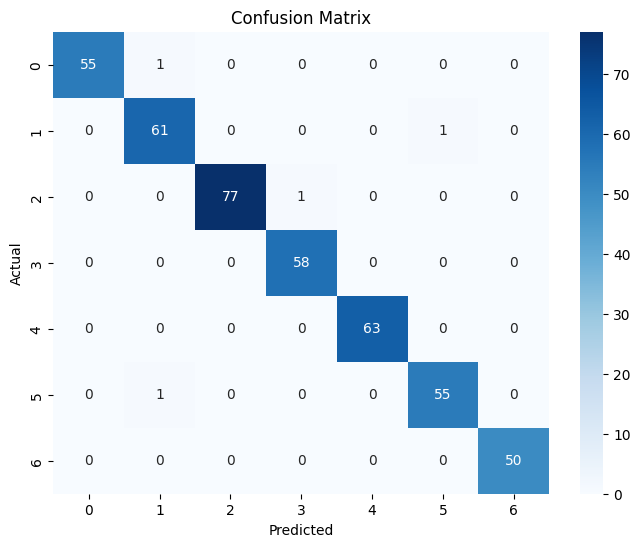

In [33]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

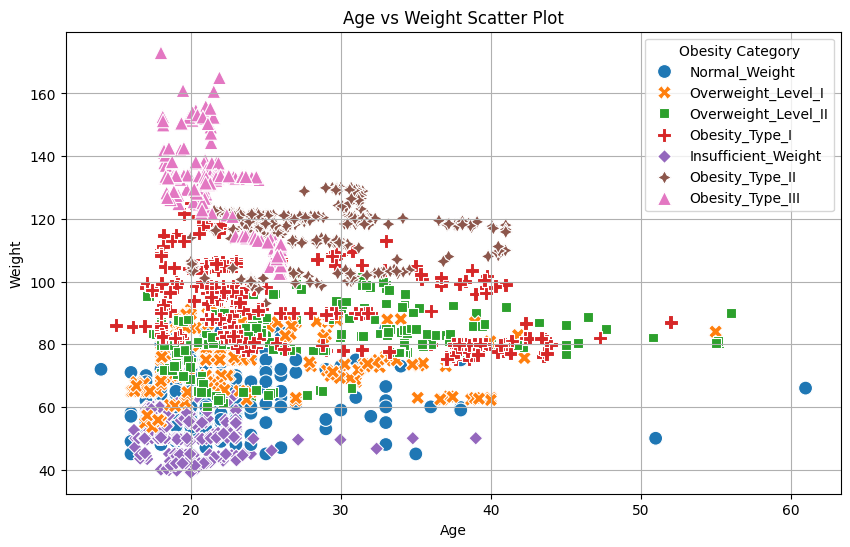

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Weight', hue='NObeyesdad', style='NObeyesdad', s=100)

# Add labels and title
plt.title("Age vs Weight Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.grid(True)
plt.legend(title='Obesity Category')


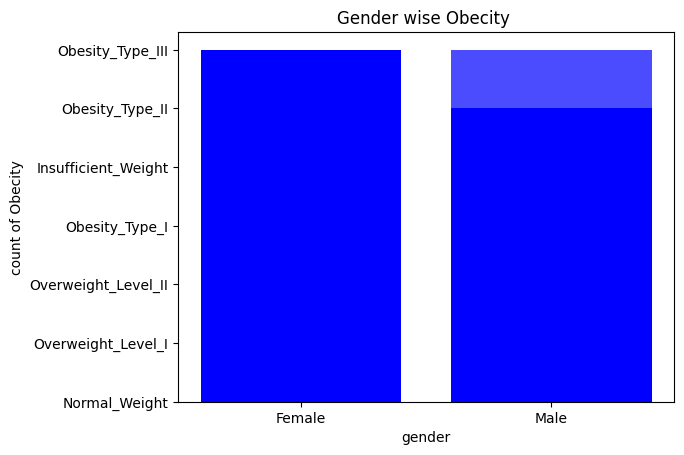

In [46]:
import matplotlib.pyplot as plt

# Example data
categories = data['Gender']
values =  data['NObeyesdad']

# Create a bar chart
plt.bar(categories, values, color='Blue', alpha=0.7)

# Add title and labels
plt.title('Gender wise Obecity ')
plt.xlabel('gender')
plt.ylabel('count of Obecity')

# Show the plot
plt.show()
